Goal

Our objective is to predict if the patient is diagonised as maligned(M) or benign(B)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import classification_report


In [2]:
data=pd.read_csv(r'E:\DS FILES\cancer_dataset.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.shape

(569, 33)

In [5]:
data.isnull().sum() 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data=data.drop(['Unnamed: 32'],axis=1)

In [7]:
data.shape

(569, 32)

In [8]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

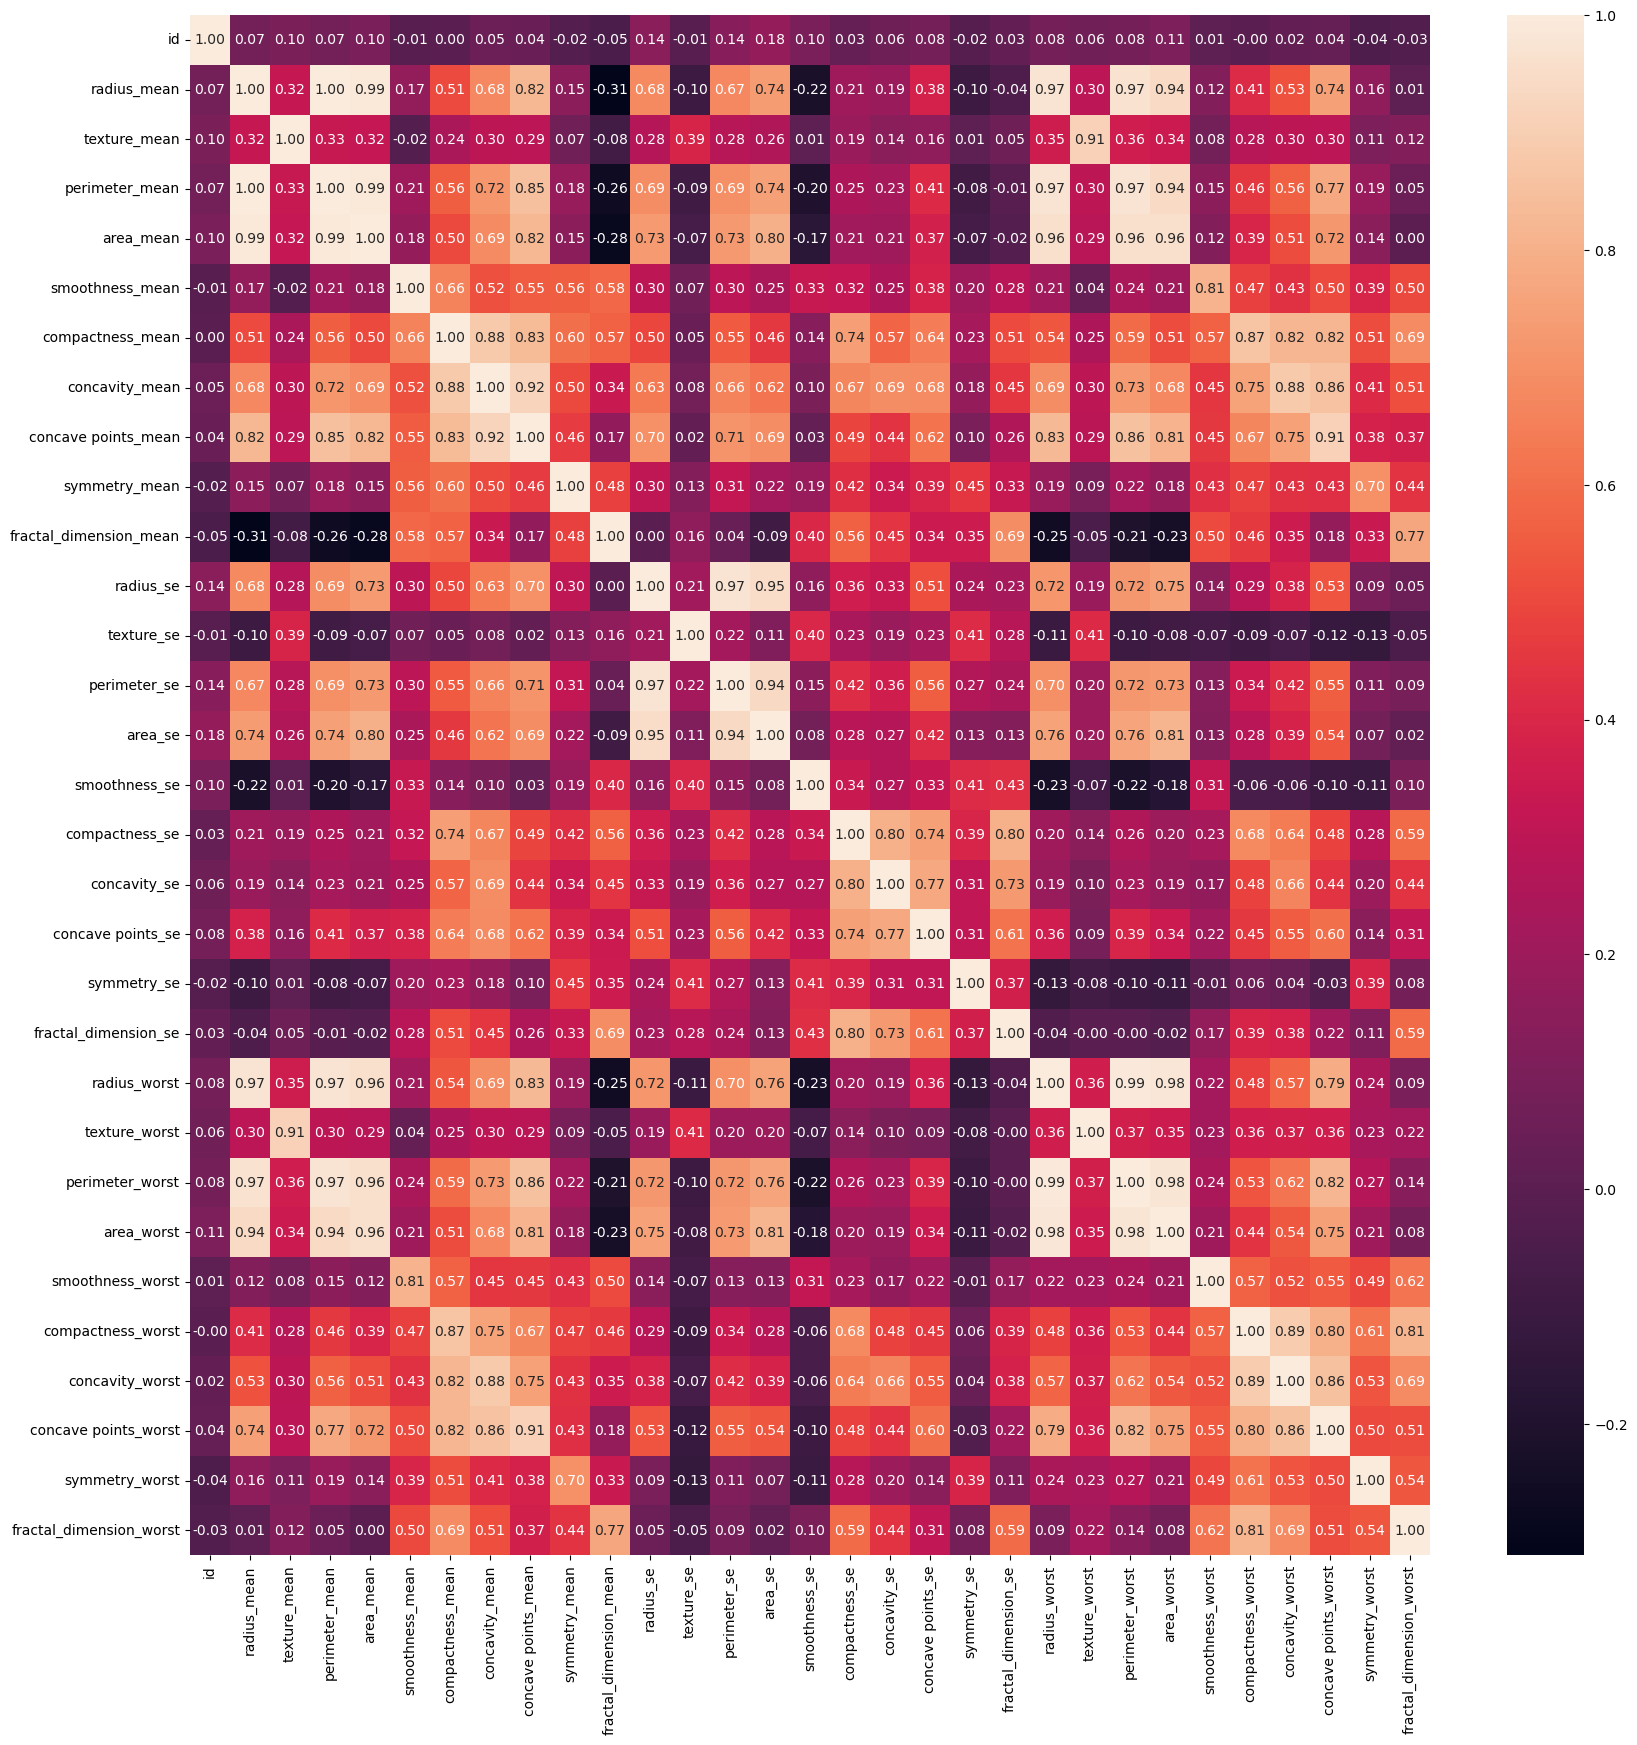

In [10]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot = True, fmt= '.2f')
plt.show()

In [11]:
X = data.iloc[:,2:32].values
y = data.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:

ac_list = []
model_names = []

# StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# LogisticRegression

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() # create an instance 
model=lr.fit(X_train,y_train)# create the model
y_pred=model.predict(X_test)  # preditction

In [16]:
confusion_matrix(y_test,y_pred)


array([[89,  0],
       [ 2, 52]], dtype=int64)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.98      1.00      0.99        89
           M       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



In [18]:
MR_ac=accuracy_score(y_test,y_pred)
ac_list.append(MR_ac)
model_names.append('LR')

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]    #empty list
neighbors=np.arange(3,15)# taking valuse for 3 to 14 to the variable 

for k in neighbors:   # creating  a loop k (3 to 14)
    # create knn model  where k is 3 first till it is 14 
    knn=KNeighborsClassifier(n_neighbors=k)    # create an instance 
    model1=knn.fit(X_train,y_train)    # create the model
    y_pred_knn=model1.predict(X_test)   # preditction
    acc=accuracy_score(y_test,y_pred_knn)  # accurary
    metric_k.append(acc)   # append accuray to list 
 # check which valuse of k will give highest accuarcy

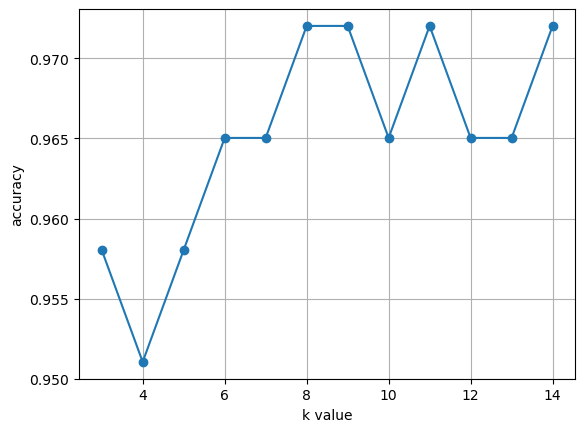

In [20]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()# k value is more for 8 so

In [21]:
knn=KNeighborsClassifier(n_neighbors=8)
model1=knn.fit(X_train,y_train)
y_pred_knn=model1.predict(X_test)

In [22]:
confusion_matrix(y_test,y_pred_knn)

array([[89,  0],
       [ 4, 50]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        89
           M       1.00      0.93      0.96        54

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [24]:
KNN_ac = accuracy_score(y_test, y_pred_knn)
ac_list.append(KNN_ac)
model_names.append('KNN')

# SVC 

In [25]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='rbf')
svm_model=svm_clf.fit(X_train,y_train)
y_pred1=svm_clf.predict(X_test)

In [26]:
confusion_matrix(y_test,y_pred1)

array([[88,  1],
       [ 3, 51]], dtype=int64)

In [27]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        89
           M       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [28]:
SVC_rbf_ac = accuracy_score(y_test, y_pred1)
ac_list.append(SVC_rbf_ac)
model_names.append('SVC_rbf_ac')

# SVC-Linear

In [29]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')
svm_model=svm_clf.fit(X_train,y_train)
y_pred2=svm_clf.predict(X_test)

In [30]:
confusion_matrix(y_test,y_pred2)  

array([[88,  1],
       [ 3, 51]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        89
           M       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [32]:
SVC_linear_ac = accuracy_score(y_test, y_pred2)
ac_list.append(SVC_linear_ac)
model_names.append('SVC_linear_ac')

# SVC-Poly

In [33]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='poly', degree=8)
svm_model=svm_clf.fit(X_train,y_train)
y_pred3=svm_clf.predict(X_test)

In [34]:
confusion_matrix(y_test,y_pred3)  

array([[88,  1],
       [30, 24]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           B       0.75      0.99      0.85        89
           M       0.96      0.44      0.61        54

    accuracy                           0.78       143
   macro avg       0.85      0.72      0.73       143
weighted avg       0.83      0.78      0.76       143



In [36]:
SVC_poly_ac = accuracy_score(y_test, y_pred3)
ac_list.append(SVC_poly_ac)
model_names.append('SVC_poly_ac')

# DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
DT_pred=dt_clf.predict(X_test)

In [38]:
confusion_matrix(y_test,DT_pred)

array([[86,  3],
       [ 5, 49]], dtype=int64)

In [39]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           B       0.95      0.97      0.96        89
           M       0.94      0.91      0.92        54

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [40]:
DT_ac = accuracy_score(y_test, DT_pred)
ac_list.append(DT_ac)
model_names.append('DT')

# RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
RFA_pred=rf_clf.predict(X_test)

In [42]:
confusion_matrix(y_test,RFA_pred) 

array([[88,  1],
       [ 4, 50]], dtype=int64)

In [43]:
print(classification_report(y_test, RFA_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        89
           M       0.98      0.93      0.95        54

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [44]:
RFA_ac = accuracy_score(y_test, RFA_pred)
ac_list.append(RFA_ac)
model_names.append('RFA')

# Comparing Models

In [45]:
model_ac = pd.DataFrame(dict(zip(model_names, ac_list)), index=['model_names']).T
model_ac.rename(columns={'model_names': "Accuracy"}, inplace=True)

round(model_ac*100, 3)

,Accuracy
LR,98.601
KNN,97.203
SVC_rbf_ac,97.203
SVC_linear_ac,97.203
SVC_poly_ac,78.322
DT,94.406
RFA,96.503


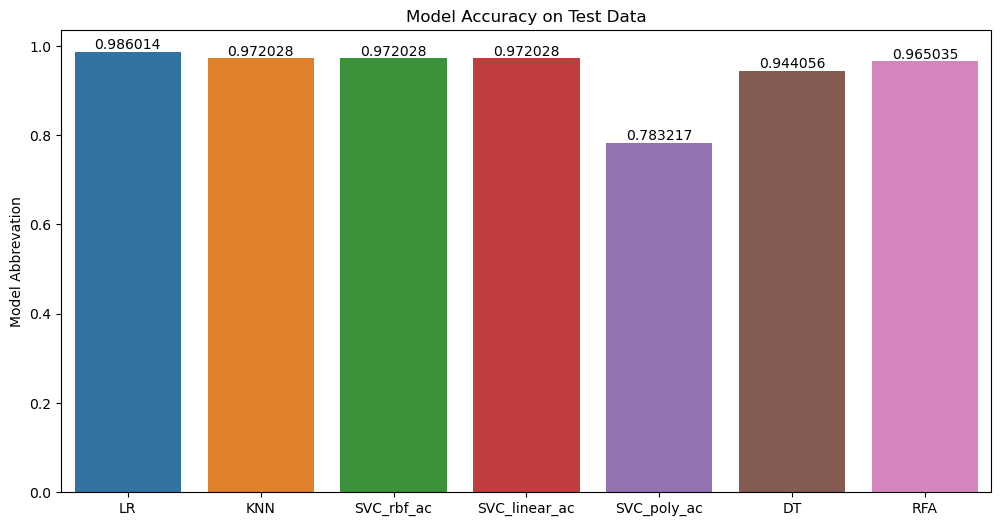

In [46]:
plt.figure(figsize=(12,6))
ax=sns.barplot(y='Accuracy', x=model_ac.index, data=model_ac)
ax.bar_label(ax.containers[0])
plt.title('Model Accuracy on Test Data')
plt.ylabel('Model Abbrevation')
plt.show()